In [1]:
import matplotlib.pyplot as plt
import matplotlib.image
import numpy as np
import cv2 as cv
from copy import deepcopy

from scipy.linalg import svd
import scipy

In [162]:
# Reading image

fname1 = "../data/MPT_I1.png"
fname2 = "../data/MPT_I2.png"

img1 = cv.cvtColor(cv.imread(fname1), cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(cv.imread(fname2), cv.COLOR_BGR2GRAY)

IMG_HEIGHT,IMG_WIDTH = img1.shape
IMG_HEIGHT,IMG_WIDTH

(858, 1431)

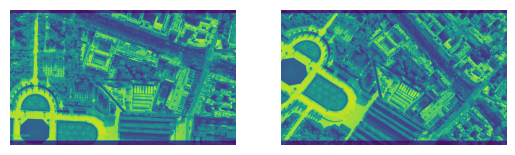

In [3]:
# Plot des points 

fig,(ax1,ax2) = plt.subplots(1,2)

ax1.imshow(img1)
ax2.imshow(img2)

ax1.set_axis_off()
ax2.set_axis_off()

In [91]:
# Liste des points homologues

points_homo = np.array([
    [(395,648),(260,362)],
    [(293,394),(402,166)],
    [(600,217),(735,183)],
    [(1242,273),(1220,515)],
    [(1144,699),(971,823)],
    [(773,503),(744,476)],
    [(248,810),(125,470)],
    [(71,638),(76,244)]
])

points_homo_test = np.array([
    [(767,624),(681,573)],
    [(150,493),(226,174)],
    [(296,703),(231,405)],
    [(1252,383),(1188,606)]
])

NBPTS = points_homo.shape[0]
NBPTS_TEST = points_homo_test.shape[0]

# append homogeneous coordinate
points_homo2 = np.ones((NBPTS,2,3))
points_homo_test2 = np.ones((NBPTS_TEST,2,3))
points_homo2[:,:,:2] = points_homo
points_homo_test2[:,:,:2] = points_homo_test

points_homo,points_homo_test = points_homo2,points_homo_test2

In [153]:
# points Philippe blans

fname1 = "../data/pointL.txt"
data1 = np.loadtxt(fname1)
fname2 = "../data/pointR.txt"
data2 = np.loadtxt(fname2)

NBPTS_PB = data1.shape[1]
points_homo_PB = np.ones((NBPTS_PB,2,3))
points_homo_PB[:,0,:2] =data1.T
points_homo_PB[:,1,:2] = data2.T

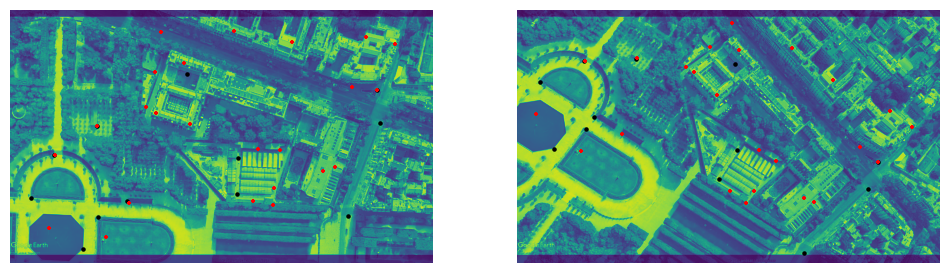

In [155]:
# Plot des points 

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,7))

ax1.imshow(img1)
ax2.imshow(img2)

ax1.scatter(points_homo[:,0,0],points_homo[:,0,1],c="k",s=5)
ax2.scatter(points_homo[:,1,0],points_homo[:,1,1],c="k",s=5)

# for i in range(NBPTS):
#     ax1.annotate(str(i),points_homo[i,0,:2],c="r")
#     ax2.annotate(str(i),points_homo[i,1,:2],c="r")

ax1.scatter(points_homo_test[:,0,0],points_homo_test[:,0,1],c='k',s=5)
ax2.scatter(points_homo_test[:,1,0],points_homo_test[:,1,1],c='k',s=5)

# for i in range(NBPTS_TEST):
#     ax1.annotate(str(i),points_homo_test[i,0,:2],c="k")
#     ax2.annotate(str(i),points_homo_test[i,1,:2],c="k")
    
ax1.scatter(points_homo_PB[:,0,0],points_homo_PB[:,0,1],c="r",s=5,marker="+")
ax2.scatter(points_homo_PB[:,1,0],points_homo_PB[:,1,1],c="r",s=5,marker="+")


ax1.set_axis_off()
ax2.set_axis_off()

In [156]:
# détermination de la matrice fondamentale par algorithme des 8 points
# construct the A matrix

points_homo_PB,points_homo = points_homo,points_homo_PB
NBPTS = points_homo.shape[0]

A = np.zeros((NBPTS,9))

for i,(pt1,pt2) in enumerate(points_homo):
    
    x,y,_   = pt1
    xp,yp,_ = pt2
    
    A[i,:] = np.array([x*xp, x*yp, x, y*xp, y*yp, y, xp, yp, 1])
    
_,_,V = svd(A)
F = V[-1,:].reshape((3,3)).T

# forcer F à etre de rang 2

U,S,V = svd(F)
S = np.diag(S)
S[2,2] = 0
F2 = U@S@V

F,F2 = F2,F

In [159]:
F

array([[-1.50097817e-07,  5.92835482e-07, -4.34519044e-03],
       [ 2.54458721e-07,  3.34673111e-07, -2.73470459e-03],
       [ 4.58836766e-03, -6.38059948e-04,  9.99976090e-01]])

In [157]:
# test de la matrice fondamentale

for i,(m,mp) in enumerate(points_homo_test):
    
    l = F@m
    n = np.sqrt(l[0]**2 + l[1]**2)
    d = mp@l/n
    
    print(d)

# print("points de base")
# for i,(m,mp) in enumerate(points_homo):
    
#     l = F@m
#     n = np.sqrt(l[0]**2 + l[1]**2)
#     d = mp@l/n
    
#     print(d)
    
print("points de base F2")
for i,(m,mp) in enumerate(points_homo):
    
    l = F2@m
    n = np.sqrt(l[0]**2 + l[1]**2)
    d = mp@l/n
    
    print(d)


0.013032011888173692
2.5284164015374424
2.166435666288607
-0.3800783317720284
points de base F2
0.9477306738122903
-0.6464095441090083
-0.8307525360999378
0.9083304124464165
0.9636267768565866
0.10220010973056054
-0.8815461269847371
0.34901381995990854
0.015178213262620636
-0.6355154339315614
-0.3425680091131638
-0.4938529374766188
0.6578060098702921
0.0009246987426822827
0.2746021874683853
-0.5802569693997727
0.4924688895491241
0.4125040535100003
-0.6047979059117135
-0.46078605287820246
-0.5517197475702774
0.06294487781560729
1.4561944994016394
-0.5703098789994399


In [158]:
from scipy.linalg import null_space

e = null_space(F).reshape(3)
ep = null_space(F.T).reshape(3)

e /= e[2]
ep /= ep[2]

print(e)
print(ep)

[8.30548249e+02 7.53978812e+03 1.00000000e+00]
[ 8.44397106e+03 -1.30510207e+04  1.00000000e+00]


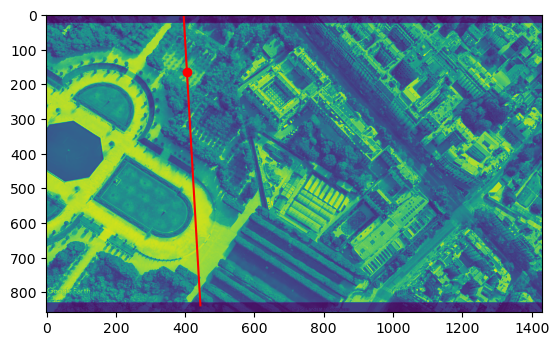

In [176]:
# Plot des lignes épipolaires

i_pt = 15
m,mp = points_homo[i_pt,:,:]
l = np.cross(e,mp)

a,b,c = l
X = np.arange(IMG_WIDTH)
Y = (-a*X-c)/b 
# bound it 
if Y[0] < 0 :
    i = np.argmin(np.abs(Y))
    X,Y = X[i:],Y[i:]
if Y[0] > IMG_HEIGHT :
    i = np.argmin(np.abs(Y-IMG_HEIGHT))
    X,Y = X[i:],Y[i:]
if Y[-1] < 0 :
    i = np.argmin(np.abs(Y))
    X,Y = X[:i],Y[:i]
if Y[-1] > IMG_HEIGHT :
    i = np.argmin(np.abs(Y-IMG_HEIGHT))
    X,Y = X[:i],Y[:i]

plt.imshow(img2)
plt.plot(X,Y,"r")
plt.scatter(mp[0],mp[1],c="r")

In [134]:
# Détermination des angles et rayon limite pour la projection polaire



NameError: name 'NBPTS_PB' is not defined

array([[[1.5100000e+02, 1.3000000e+02, 1.0000000e+00],
        [2.2955933e+02, 6.4456188e+01, 1.0000000e+00]],

       [[4.0400000e+02, 3.2600000e+02, 1.0000000e+00],
        [3.5319696e+02, 2.1672194e+02, 1.0000000e+00]],

       [[8.3900000e+02, 8.9300000e+02, 1.0000000e+00],
        [8.1635500e+02, 7.9972688e+02, 1.0000000e+00]],

       [[8.2100000e+02, 8.9100000e+02, 1.0000000e+00],
        [7.2042273e+02, 7.7498778e+02, 1.0000000e+00]],

       [[1.0600000e+03, 1.0980000e+03, 1.0000000e+00],
        [9.7037097e+02, 1.0055138e+03, 1.0000000e+00]],

       [[1.1580000e+03, 1.2430000e+03, 1.0000000e+00],
        [1.1583167e+03, 1.2209729e+03, 1.0000000e+00]],

       [[1.3040000e+03, 1.2040000e+03, 1.0000000e+00],
        [1.3341161e+03, 1.2618029e+03, 1.0000000e+00]],

       [[5.1100000e+02, 2.9400000e+02, 1.0000000e+00],
        [7.2597359e+02, 4.0520486e+02, 1.0000000e+00]],

       [[4.5900000e+02, 4.9000000e+02, 1.0000000e+00],
        [5.7128407e+02, 6.5023541e+02, 1.0000000e